#Definir el entorno del rompecabezas
Primero, vamos a definir el entorno del rompecabezas. Este será un entorno simple donde el objetivo es mover un agente desde una posición inicial hasta una posición objetivo.

In [1]:
import gymnasium as gym
import numpy as np
import random

class PuzzleEnv(gym.Env):
    def __init__(self):
        self.observation_space = gym.spaces.Discrete(20)  # 4 filas x 5 columnas = 20 estados
        self.action_space = gym.spaces.Discrete(4)  # 4 acciones: 0 = arriba, 1 = derecha, 2 = abajo, 3 = izquierda
        self.reset()

    def reset(self):
        self.agent_pos = [0, 0]  # Posición inicial en la esquina superior izquierda
        self.goal_pos = [3, 4]  # Posición objetivo en la esquina inferior derecha
        return self._get_state()

    def _get_state(self):
        return self.agent_pos[0] * 5 + self.agent_pos[1]  # Convertir coordenadas 2D a un único estado

    def step(self, action):
        if action == 0 and self.agent_pos[0] > 0:  # Arriba
            self.agent_pos[0] -= 1
        elif action == 1 and self.agent_pos[1] < 4:  # Derecha
            self.agent_pos[1] += 1
        elif action == 2 and self.agent_pos[0] < 3:  # Abajo
            self.agent_pos[0] += 1
        elif action == 3 and self.agent_pos[1] > 0:  # Izquierda
            self.agent_pos[1] -= 1

        reward = -1  # Penalización por cada movimiento
        done = False

        if self.agent_pos == self.goal_pos:
            reward = 0  # Recompensa por llegar al objetivo
            done = True

        return self._get_state(), reward, done, {}

    def render(self, mode='human'):
        grid = np.zeros((4, 5))
        grid[self.agent_pos[0], self.agent_pos[1]] = 1
        grid[self.goal_pos[0], self.goal_pos[1]] = 2
        print(grid)


env = PuzzleEnv()


Paso 2: Implementar el algoritmo de Q-learning
Ahora, vamos a implementar el algoritmo de Q-learning para resolver este rompecabezas.

Episodio: 100, Recompensa: -18
Episodio: 200, Recompensa: -14
Episodio: 300, Recompensa: -7
Episodio: 400, Recompensa: -6
Episodio: 500, Recompensa: -6
Episodio: 600, Recompensa: -8
Episodio: 700, Recompensa: -6
Episodio: 800, Recompensa: -6
Episodio: 900, Recompensa: -6
Episodio: 1000, Recompensa: -11
Episodio: 1100, Recompensa: -6
Episodio: 1200, Recompensa: -6
Episodio: 1300, Recompensa: -6
Episodio: 1400, Recompensa: -6
Episodio: 1500, Recompensa: -6
Episodio: 1600, Recompensa: -7
Episodio: 1700, Recompensa: -6
Episodio: 1800, Recompensa: -6
Episodio: 1900, Recompensa: -6
Episodio: 2000, Recompensa: -6
Episodio: 2100, Recompensa: -6
Episodio: 2200, Recompensa: -6
Episodio: 2300, Recompensa: -7
Episodio: 2400, Recompensa: -6
Episodio: 2500, Recompensa: -6
Episodio: 2600, Recompensa: -7
Episodio: 2700, Recompensa: -6
Episodio: 2800, Recompensa: -6
Episodio: 2900, Recompensa: -6
Episodio: 3000, Recompensa: -6
Episodio: 3100, Recompensa: -6
Episodio: 3200, Recompensa: -7
Episodio: 3300

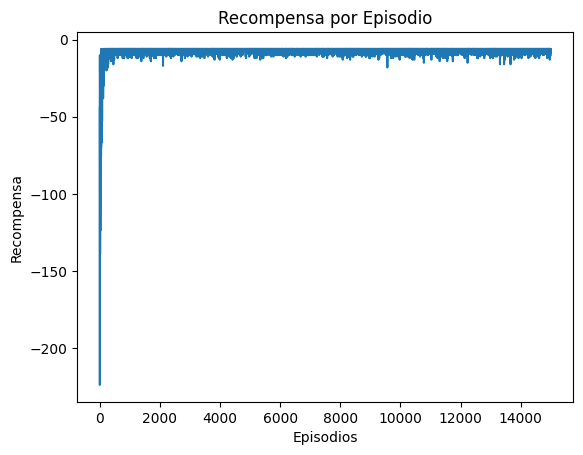

In [5]:
def q_learning(env, episodes=15000, learning_rate=0.1, discount_factor=0.99, epsilon=1, epsilon_decay=0.995, epsilon_min=0.1):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all_episodes = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_rewards = 0

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Exploración
            else:
                action = np.argmax(q_table[state, :])  # Explotación

            new_state, reward, done, _ = env.step(action)
            q_table[state, action] = q_table[state, action] + learning_rate * (reward + discount_factor * np.max(q_table[new_state, :]) - q_table[state, action])
            state = new_state
            total_rewards += reward

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        rewards_all_episodes.append(total_rewards)

        if (episode + 1) % 100 == 0:
            print(f'Episodio: {episode + 1}, Recompensa: {total_rewards}')

    return q_table, rewards_all_episodes

q_table, rewards_all_episodes = q_learning(env)

# Graficar las recompensas
import matplotlib.pyplot as plt

plt.plot(rewards_all_episodes)
plt.xlabel('Episodios')
plt.ylabel('Recompensa')
plt.title('Recompensa por Episodio')
plt.show()


Paso 3: Probar el modelo entrenado
Finalmente, vamos a probar el modelo entrenado para ver cómo se comporta.

In [3]:
def test_agent(env, q_table):
    state = env.reset()
    done = False

    while not done:
        env.render()
        action = np.argmax(q_table[state, :])
        state, _, done, _ = env.step(action)

    env.render()
    print("¡Objetivo alcanzado!")

test_agent(env, q_table)


[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 2.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 2.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 2.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]]
¡Objetivo alcanzado!
